In [46]:
###Assignment 5 - PYBER

#include written descriptions of three observable trends based on data


In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [48]:
city_data_df = pd.read_csv("/Users/emmanuelfabre/desktop/pythonstuff/Unit5_Intro_to_Matplotlib/Assignment_5/05_matplotlib_homework_Instructions_Pyber_data_city_data.csv")
ride_data_df = pd.read_csv("/Users/emmanuelfabre/desktop/pythonstuff/Unit5_Intro_to_Matplotlib/Assignment_5/05_matplotlib_homework_Instructions_Pyber_data_ride_data.csv")

#city_data_df.head()
#ride_data_df.head()

In [49]:
#merge two datasets on 'city'
combined_df = pd.merge(city_data_df, ride_data_df, how='outer', on='city')
combined_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [50]:
city_group = combined_df.groupby(["city"])


#avg fare per city - creates the Y-axis value
avg_fare = city_group["fare"].mean()
avg_fare
#total num drivers per city - creates the circle size
total_drivers = city_group["driver_count"].mean()
total_drivers

#city type
only_urban = combined_df.loc[combined_df["type"] == "Urban", :]
only_urban.type.count()
only_suburban = combined_df.loc[combined_df["type"] == "Suburban", :]
only_suburban.type.count()
only_rural = combined_df.loc[combined_df["type"] == "Rural", :]
#only_rural.type.count()


In [51]:
only_urban = combined_df.loc[combined_df["type"] == "Urban", :]
only_urban.type.count()

only_urban_group = only_urban.groupby(["city"])
urban_num_rides = only_urban["city"].count()
only_urban_group.head()

urban_num_rides = only_urban_group["city"].count()
urban_num_rides
#avg urban fare per city
urban_avg_fare = only_urban_group["fare"].mean()
urban_avg_fare

urban_total_drivers = only_urban_group["driver_count"].mean()
#urban_total_drivers

In [52]:
only_suburban = combined_df.loc[combined_df["type"] == "Suburban", :]
only_suburban.type.count()

only_suburban_group = only_suburban.groupby(["city"])
suburban_num_rides = only_suburban["city"].count()
only_suburban_group.head()

suburban_num_rides = only_suburban_group["city"].count()
suburban_num_rides
#avg suburban fare per city
suburban_avg_fare = only_suburban_group["fare"].mean()
suburban_avg_fare

suburban_total_drivers = only_suburban_group["driver_count"].mean()
#suburban_total_drivers

In [53]:

only_rural = combined_df.loc[combined_df["type"] == "Rural", :]
only_rural.type.count()

only_rural_group = only_rural.groupby(["city"])
rural_num_rides = only_rural["city"].count()
only_rural_group.head()

rural_num_rides = only_rural_group["city"].count()
rural_num_rides
#avg rural fare per city
rural_avg_fare = only_rural_group["fare"].mean()
rural_avg_fare

rural_total_drivers = only_rural_group["driver_count"].mean()
#rural_total_drivers


In [54]:
######RURAL##########
#find max driver count to find upper x limit
total_drivers.max()
# The x and y axis bounds for our chart will be..
x_limit = total_drivers.max()
y_limit = avg_fare.max()
# List of values from 0 to 75, each value 1 greater than the last
rural_x_axis = rural_num_rides          

#list of values from 0 to 50, each value 1 greater than the last 
rural_y_axis = rural_avg_fare     


#######URBAN#######
# List of values from 0 to 75, each value 1 greater than the last
urban_x_axis = urban_num_rides           

#list of values from 0 to 50, each value 1 greater than the last 
urban_y_axis = urban_avg_fare       


######SUBURBAN#######
# List of values from 0 to 75, each value 1 greater than the last
suburban_x_axis = suburban_num_rides           #num_rides(0, x_limit, 1)

#list of values from 0 to 50, each value 1 greater than the last 
suburban_y_axis = suburban_avg_fare       #avg_fare(0, y_limit, 1)


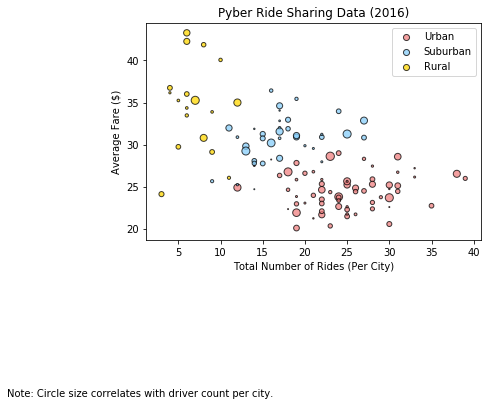

In [55]:
# Create a title, x label, and y label for our chart
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")


# Tells matplotlib that we want to make a scatter plot
# The size of each point on our plot is determined by their x value
#created handle for each plot
rural = plt.scatter(rural_x_axis, rural_y_axis, marker="o", facecolors="gold", edgecolors="black", s=total_drivers, alpha=0.75, label="Rural")
urban = plt.scatter(urban_x_axis, urban_y_axis, marker="o", facecolors="lightcoral", edgecolors="black", s=total_drivers, alpha=0.75, label="Urban")
suburban = plt.scatter(suburban_x_axis, suburban_y_axis, marker="o", facecolors="lightskyblue", edgecolors="black", s=total_drivers, alpha=0.75, label="Suburban")


#create legend (where chart thinks is best)
plt.legend(handles=[urban, suburban, rural], loc="best")

#create note regarding circle size
plt.text(.5, .05, "Note: Circle size correlates with driver count per city.", ha='center')


plt.savefig("Images/PyScPlot.png")
plt.show()

In [56]:
## Total Fares by City Type
suburban_sum_fare = only_suburban_group["fare"].sum()
#suburban_sum_fare.sum()

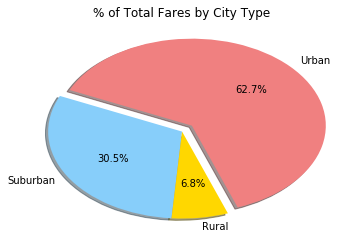

In [57]:
#total fare by city type pie chart
#total urban fares
urban_sum_fare = only_urban_group["fare"].sum()
urban_sum_fare.sum()

#total suburban fares
suburban_sum_fare = only_suburban_group["fare"].sum()
suburban_sum_fare.sum()

#total rural fares
rural_sum_fare = only_rural_group["fare"].sum()
rural_sum_fare.sum()


# Labels for the pie chart % of Total Fares by City Type
labels = ["Urban", "Suburban", "Rural"]
# The values of each section of the pie chart
sizes = [urban_sum_fare.sum(), suburban_sum_fare.sum(), rural_sum_fare.sum()]
# The colors of each section of the pie chart
colors = ["lightcoral", "lightskyblue", "gold"]
# seperate the "Urban" section from others
explode = (0.1, 0, 0)

#Set pie chart title
plt.title("% of Total Fares by City Type")

# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, labels=labels, colors=colors, explode=explode, autopct="%1.1f%%", shadow=True, startangle=290)
plt.savefig("Images/FareByCityPie.png")

plt.show()

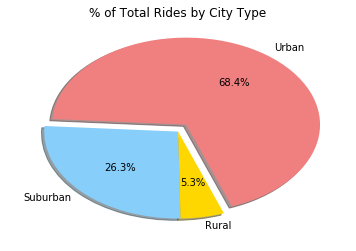

In [58]:
#total rides by city type pie chart
#total urban rides
urban_num_rides.sum()
#total suburban rides
suburban_num_rides.sum()
#total rural rides
rural_num_rides.sum()


# Labels for the pie chart % of Total Fares by City Type
labels = ["Urban", "Suburban", "Rural"]
# The values of each section of the pie chart
sizes = [urban_num_rides.sum(), suburban_num_rides.sum(), rural_num_rides.sum()]
# The colors of each section of the pie chart
colors = ["lightcoral", "lightskyblue", "gold"]
# seperate the "Urban" section from others
explode = (0.1, 0, 0)

#Set pie chart title
plt.title("% of Total Rides by City Type")

# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, labels=labels, colors=colors, explode=explode, autopct="%1.1f%%", shadow=True, startangle=290)
plt.savefig("Images/RidesByCityPie.png")

plt.show()

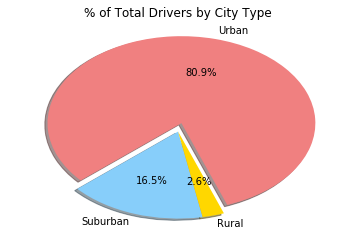

In [59]:
#total drivers by city type pie chart
#total urban drivers
urban_total_drivers.sum()
#total suburban drivers
suburban_total_drivers.sum()
#total rural drivers
rural_total_drivers.sum()


# Labels for the pie chart % of Total Drivers by City Type
labels = ["Urban", "Suburban", "Rural"]
# The values of each section of the pie chart
sizes = [urban_total_drivers.sum(), suburban_total_drivers.sum(), rural_total_drivers.sum()]
# The colors of each section of the pie chart
colors = ["lightcoral", "lightskyblue", "gold"]
# seperate the "Urban" section from others
explode = (0.1, 0, 0)

#Set pie chart title
plt.title("% of Total Drivers by City Type")

# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, labels=labels, colors=colors, explode=explode, autopct="%1.1f%%", shadow=True, startangle=290)
plt.savefig("Images/DriversByCityPie.png")

plt.show()
